## Data Cleaning

1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

2. Import Data

In [2]:
data = pd.read_excel("./regression_data.xlsx", engine="openpyxl")

3. Understanding data

In [3]:
data.shape

(21597, 21)

In [4]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
round(data.isna().sum()/len(data),4)*100 #Observamos que no hay nulls, pero seguimos analizando si todas las variables nos son útiles

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [6]:
data.drop(['lat', 'long'], axis=1, inplace=True) #Hemos eliminado las columnas de latitud y longitud ya que no vamos a hacer visualizaciones de gráficos y no es relevante en un dataset tan pequeño

In [7]:
data = data.drop_duplicates()

In [8]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [9]:
data.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000


In [10]:
for c in data.columns.tolist():        
    print(c, len(data[c].unique()))

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
sqft_living15 777
sqft_lot15 8682
price 3622


In [11]:
data.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

4. Tratamiento de valores númericos y categoricos

In [12]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [13]:
#Todas las variables son numéricas menos la fecha, así que la convertimos en númerica para que funcione el modelo

In [14]:
import datetime

In [15]:
def transformar_fecha(data):
    data['Year'] = data['date'].dt.year
    data['Month'] = data['date'].dt.year
    data['Day'] = data['date'].dt.year
    return data.drop(['date'], axis=1)
#nos quedamos unicamente con el año

In [16]:
data = transformar_fecha(data)

In [17]:
data.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
Year               int64
Month              int64
Day                int64
dtype: object

5. Observamos los outliers

In [18]:
import seaborn as sns 
%matplotlib inline

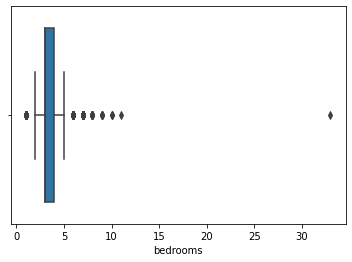

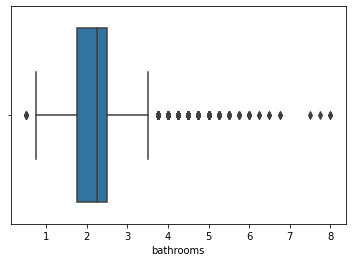

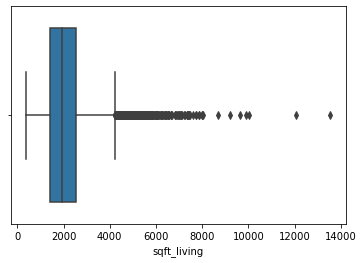

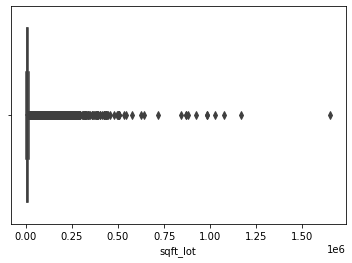

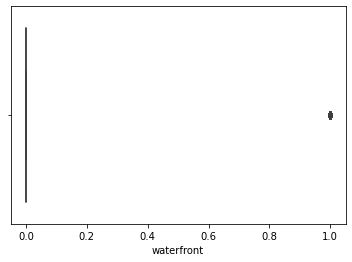

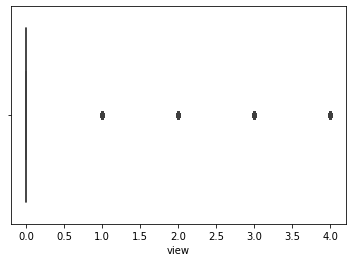

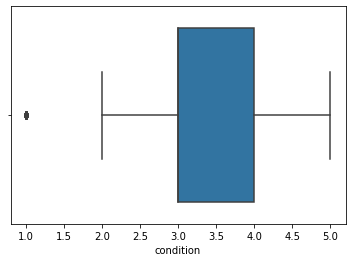

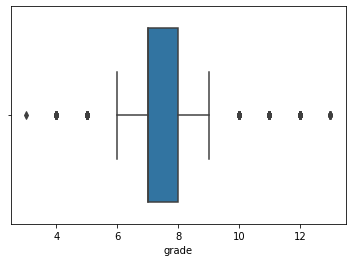

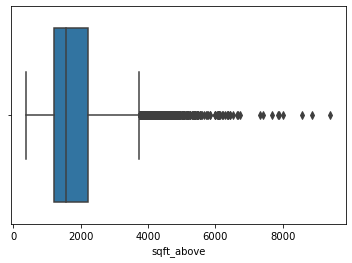

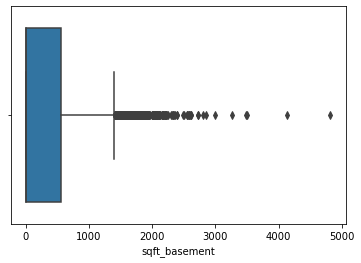

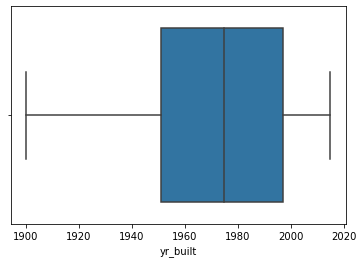

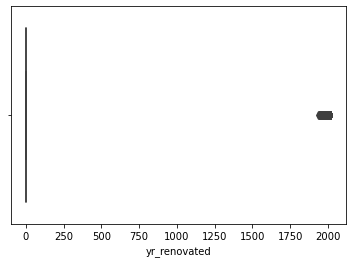

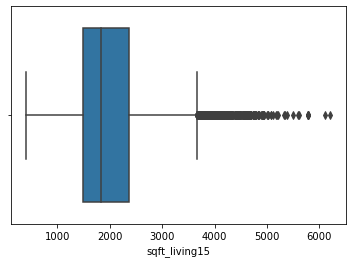

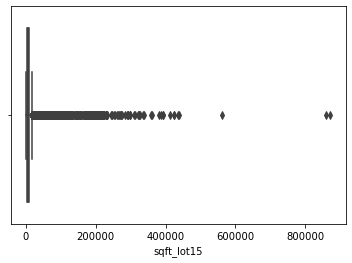

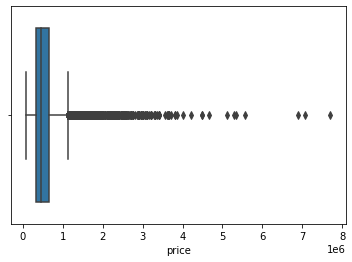

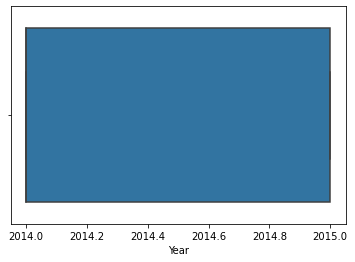

In [19]:
sns.boxplot(x=data['bedrooms'])
plt.show()

sns.boxplot(x=data['bathrooms'])
plt.show()

sns.boxplot(x=data['sqft_living'])
plt.show()

sns.boxplot(x=data['sqft_lot'])
plt.show()

sns.boxplot(x=data['waterfront'])
plt.show()

sns.boxplot(x=data['view'])
plt.show()

sns.boxplot(x=data['condition'])
plt.show()

sns.boxplot(x=data['grade'])
plt.show()

sns.boxplot(x=data['sqft_above'])
plt.show()

sns.boxplot(x=data['sqft_basement'])
plt.show()

sns.boxplot(x=data['yr_built'])
plt.show()

sns.boxplot(x=data['yr_renovated'])
plt.show()

sns.boxplot(x=data['sqft_living15'])
plt.show()

sns.boxplot(x=data['sqft_lot15'])
plt.show()

sns.boxplot(x=data['price'])
plt.show()

sns.boxplot(x=data['Year'])
plt.show()

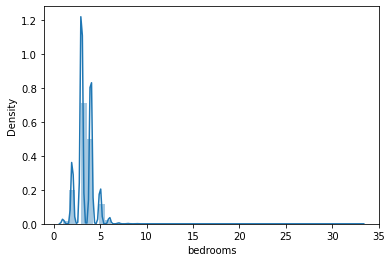

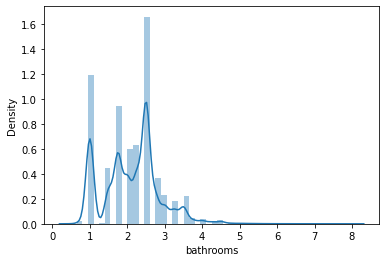

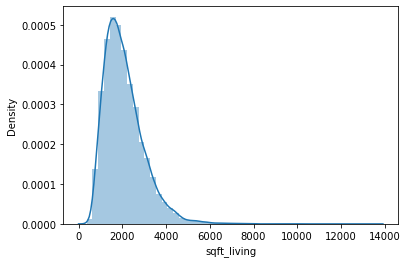

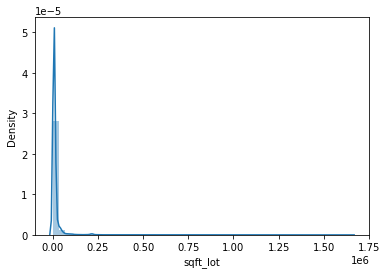

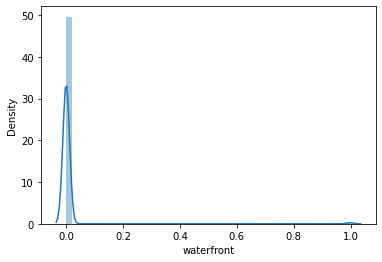

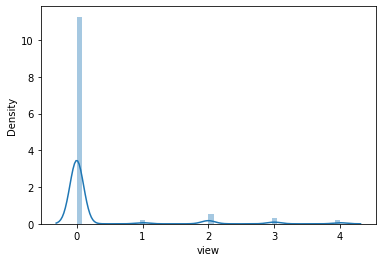

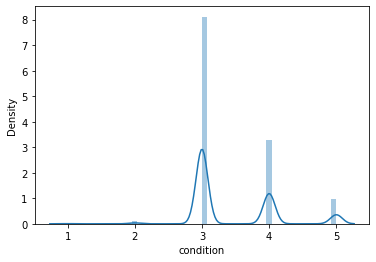

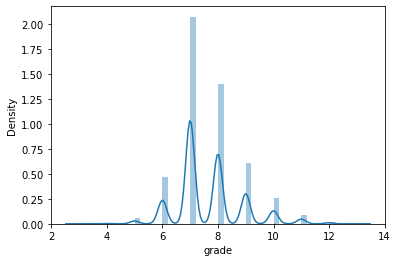

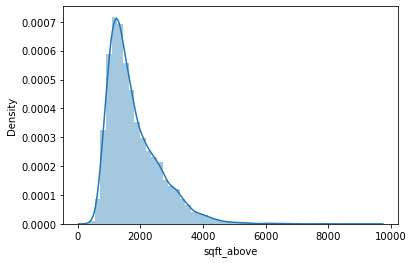

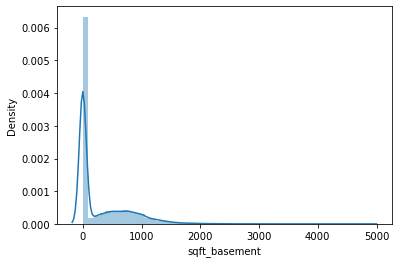

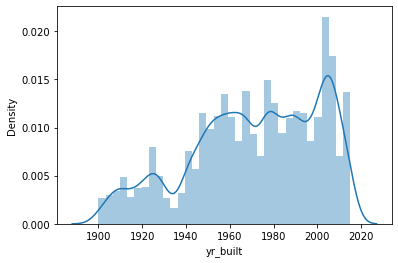

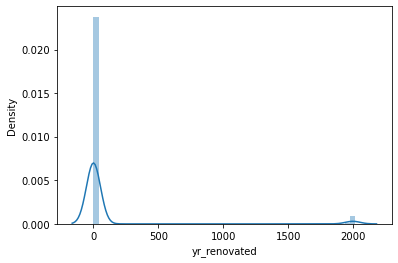

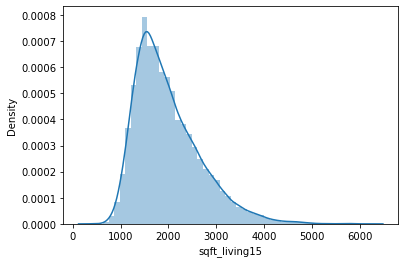

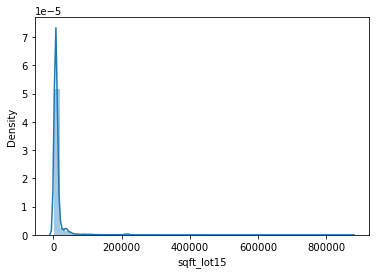

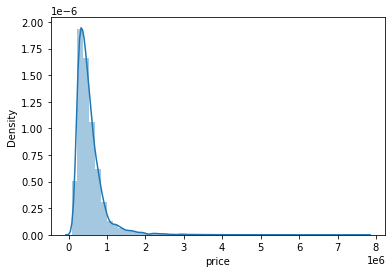

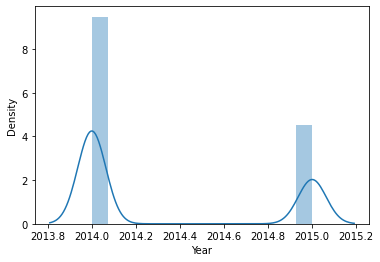

In [20]:
sns.distplot(data['bedrooms'])
plt.show()

sns.distplot(data['bathrooms'])
plt.show()

sns.distplot(data['sqft_living'])
plt.show()

sns.distplot(data['sqft_lot'])
plt.show()

sns.distplot(data['waterfront'])
plt.show()

sns.distplot(data['view'])
plt.show()

sns.distplot(data['condition'])
plt.show()

sns.distplot(data['grade'])
plt.show()

sns.distplot(data['sqft_above'])
plt.show()

sns.distplot(data['sqft_basement'])
plt.show()

sns.distplot(data['yr_built'])
plt.show()

sns.distplot(data['yr_renovated'])
plt.show()

sns.distplot(data['sqft_living15'])
plt.show()

sns.distplot(data['sqft_lot15'])
plt.show()

sns.distplot(data['price'])
plt.show()

sns.distplot(data['Year'])
plt.show()

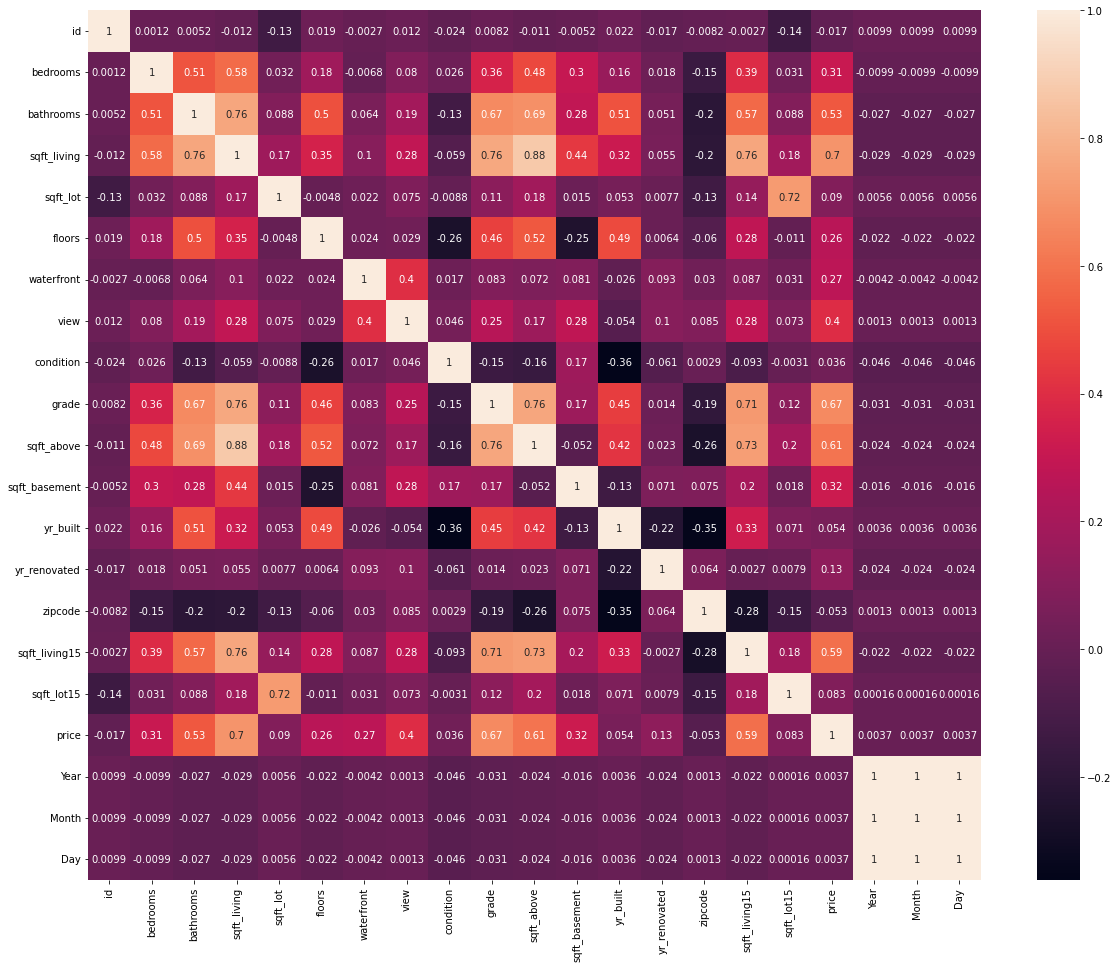

In [21]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
data.waterfront = data.waterfront.astype('object')
data.view = data.view.astype('object')
data.condition = data.condition.astype('object')
data.grade = data.grade.astype('object')

In [23]:
cat_cols = data.select_dtypes(object).columns
cat_cols

Index(['waterfront', 'view', 'condition', 'grade'], dtype='object')

In [24]:
one_hot_data = pd.get_dummies(data[cat_cols], drop_first=True) 
one_hot_data.head(2)

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
data = pd.concat([data, one_hot_data], axis=1)   
data.drop(columns=cat_cols, inplace=True)

In [26]:
data.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,Year,Month,Day,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,3,1.00,1180,5650,1.0,1180,0,1955,0,98178,1340,5650,221900,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,2170,400,1951,1991,98125,1690,7639,538000,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,770,0,1933,0,98028,2720,8062,180000,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,1050,910,1965,0,98136,1360,5000,604000,2014,2014,2014,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,3,2.00,1680,8080,1.0,1680,0,1987,0,98074,1800,7503,510000,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


5. Definir moelo

In [27]:
Y = data['price']
data = data.drop(['price'], axis=1)
X_num = data.select_dtypes(include = np.number)
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(21597, 35)


In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
X_train, X_test, y_train, y_test = tts(X_num, Y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled =  standard.fit_transform(X_test)

6. Modelo

In [32]:
from sklearn.linear_model import LinearRegression as LinReg
linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_test, y_pred_linreg)

137184.19884166078

In [35]:
R2 = linreg.score(X_test, y_test)

In [36]:
R2

0.645232202373477

In [37]:
data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Year,Month,Day,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,3,1.00,1180,5650,1.0,1180,0,1955,0,98178,1340,5650,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,2170,400,1951,1991,98125,1690,7639,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,770,0,1933,0,98028,2720,8062,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,1050,910,1965,0,98136,1360,5000,2014,2014,2014,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,3,2.00,1680,8080,1.0,1680,0,1987,0,98074,1800,7503,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,1530,0,2009,0,98103,1530,1509,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21593,6600060120,4,2.50,2310,5813,2.0,2310,0,2014,0,98146,1830,7200,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21594,1523300141,2,0.75,1020,1350,2.0,1020,0,2009,0,98144,1020,2007,2014,2014,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
21595,291310100,3,2.50,1600,2388,2.0,1600,0,2004,0,98027,1410,1287,2015,2015,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
Y.mean()

540296.5735055795